
# Task 04-Exploratory Data Analysis - Terrorism

In this task Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA? 

### Author - Vaibhav Sontakke

***Importing Requires libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***Loading Dataset***

In [2]:
Terror_data = pd.read_csv('globalterrorismdb.csv',encoding = "ISO-8859-1", engine='python')

In [3]:
Terror_data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
Terror_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
Terror_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

***Dropping Unneccessary Columns***

In [6]:
dataset=Terror_data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
dataset.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
#Checking what all columns are empty
dataset.isnull()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
181689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


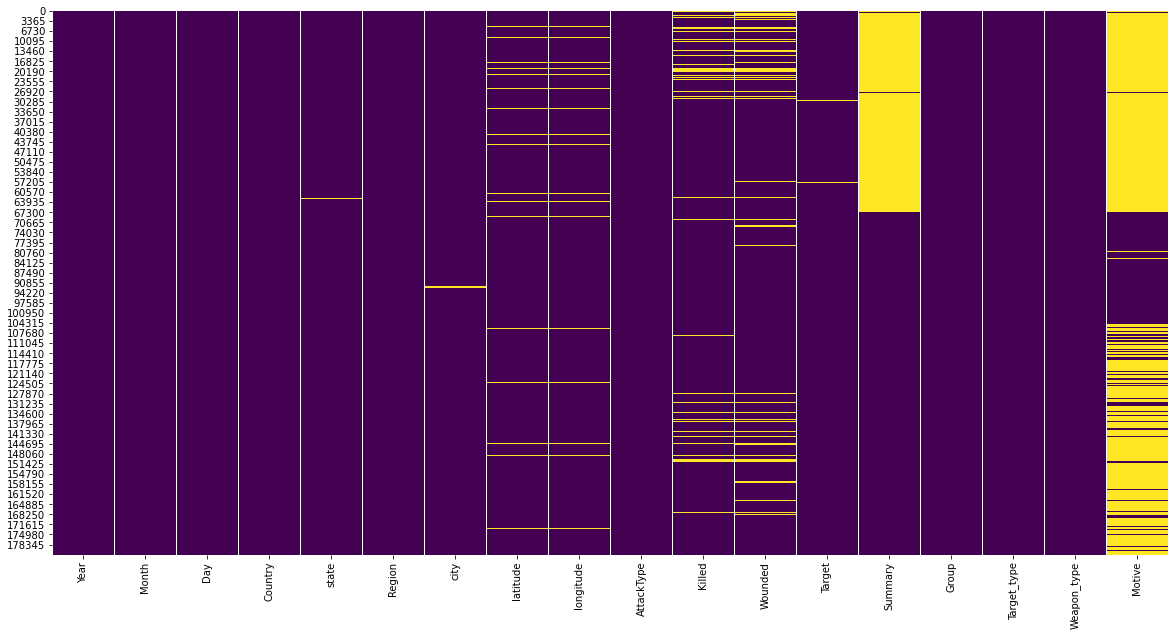

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset. isnull() ,cbar = False , cmap='viridis')

As we can see now that after dropping few of the unnecessary columns there are only few NaN values in the data.

In [9]:
dataset.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


***Data Visualisation***

**Plotting an Histogram of data**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b8511be80>,
      dtype=object)

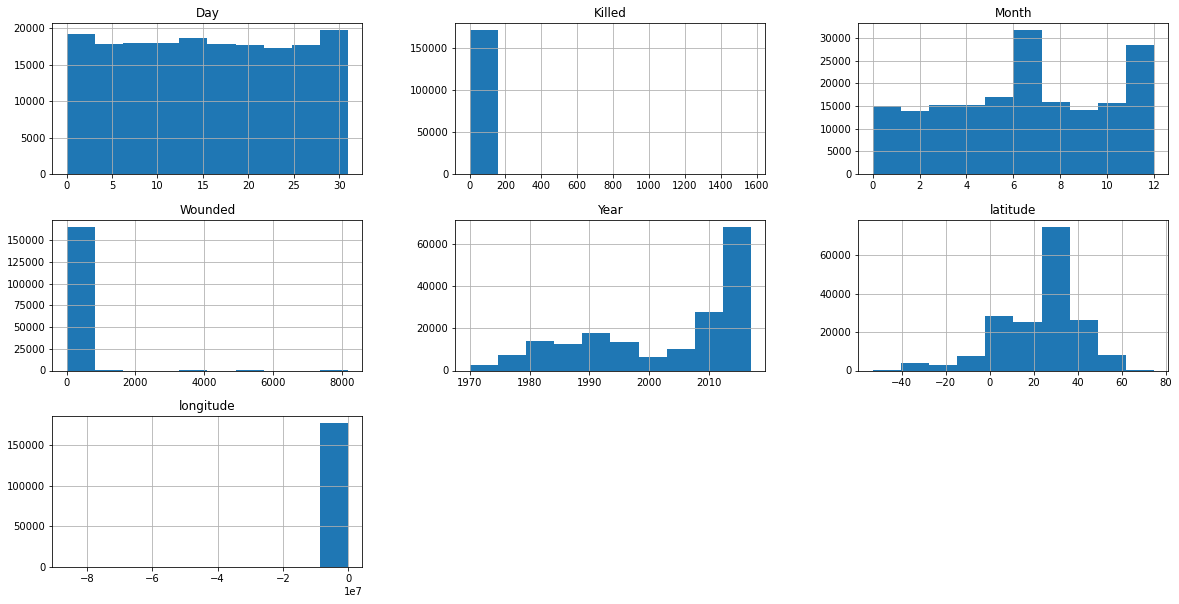

In [10]:
dataset.hist(figsize=(20,10))

It is done to find out the skewness of our data

***Plotting Heatmap of Correlation of Data***

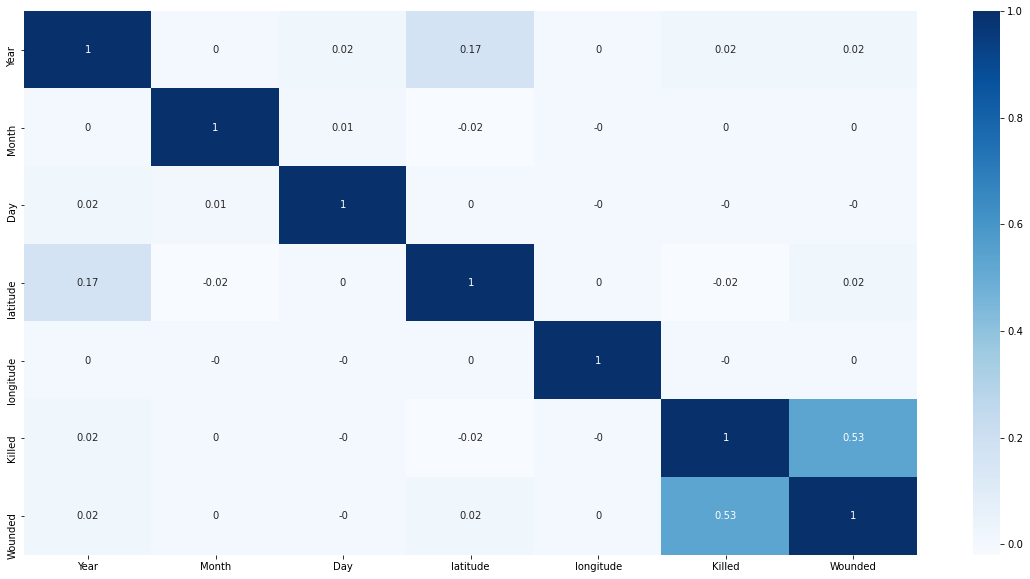

In [11]:
plt.figure(figsize= (20,10))
sns.heatmap(np.round(dataset.corr(),2),annot= True,cmap='Blues')

This correlation tells us how much a varibale is related to another variable. The darker box indicates that the variable is highly correlated, whereas a ligther one tells that the varibale is less correlated.

***Plotting a Countplot of Successful Terrorist Attack***

Text(0.5, 1.0, 'Trend in increase of Terrorist attack from 1970 to 2017')

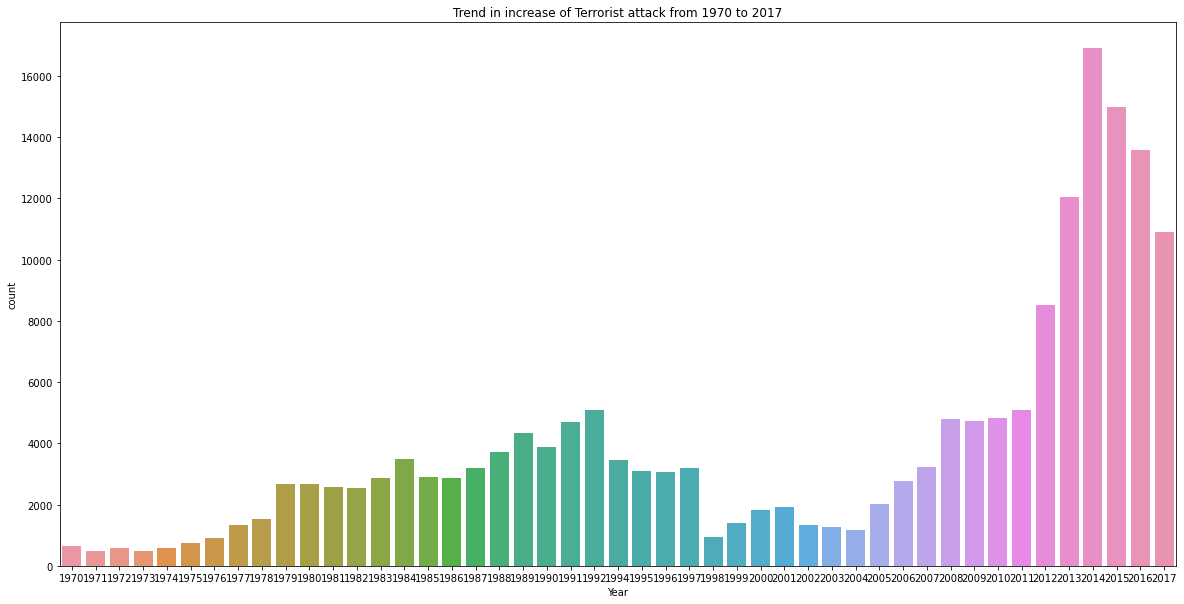

In [12]:
plt.figure(figsize =(20,10))
sns.countplot(x ='Year',data = dataset)
plt.title('Trend in increase of Terrorist attack from 1970 to 2017')

It can be seen from the above graph that as we moves towards 2017 the terrorist attacks have increased. Most attacks have taken place in the year 2014.

***Number of attack were there in 1970 & 2017 and Also find percentage of the attacks have increased***

In [13]:
Year = dataset.Year.value_counts().to_dict()
rate =((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 & ',Year[2017],' attacks happened in 2017.')
print('So the number of attacks from 1970 has increased by ',np.round(rate,0),'% till 2017.')

651 attacks happened in 1970 &  10900  attacks happened in 2017.
So the number of attacks from 1970 has increased by  94.0 % till 2017.


***Plotting Attack Methods***

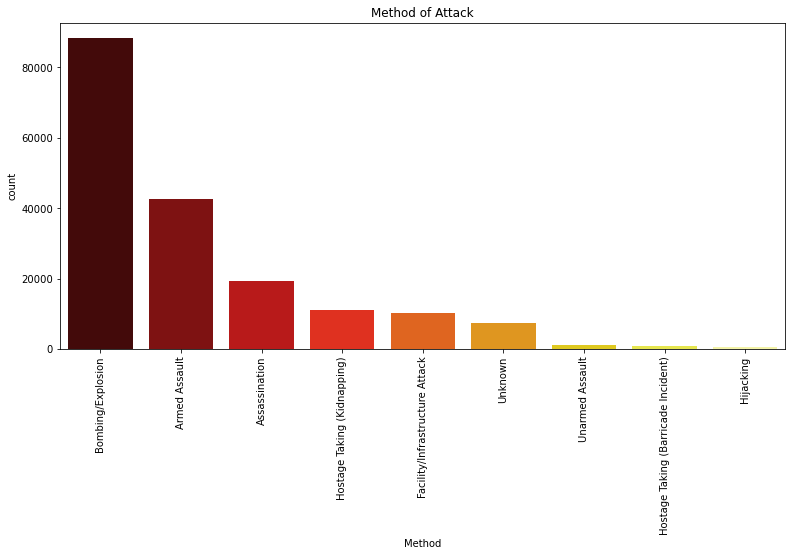

In [14]:
plt.figure(figsize=(13,6))
sns.countplot(dataset['AttackType'],order=dataset['AttackType'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

According to the above graph we can say that Bombing/Explosion method has been used over the years for attack.

***Plotting Target Types***

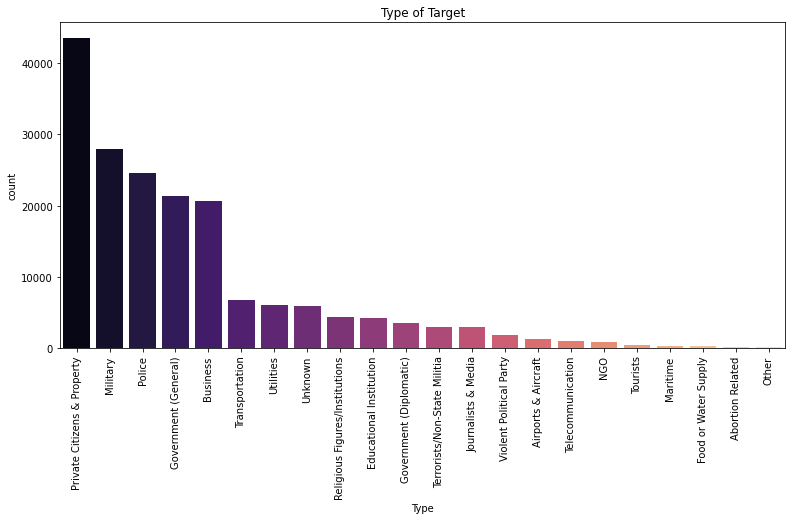

In [15]:
plt.figure(figsize=(13,6))
sns.countplot(dataset['Target_type'],order=dataset['Target_type'].value_counts().index,
              palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

From the above graph we can say that Private Citizens & Property have been targeted by the terrorist.

***Plotting Terrorist Attack Country-wise and Region-wise***

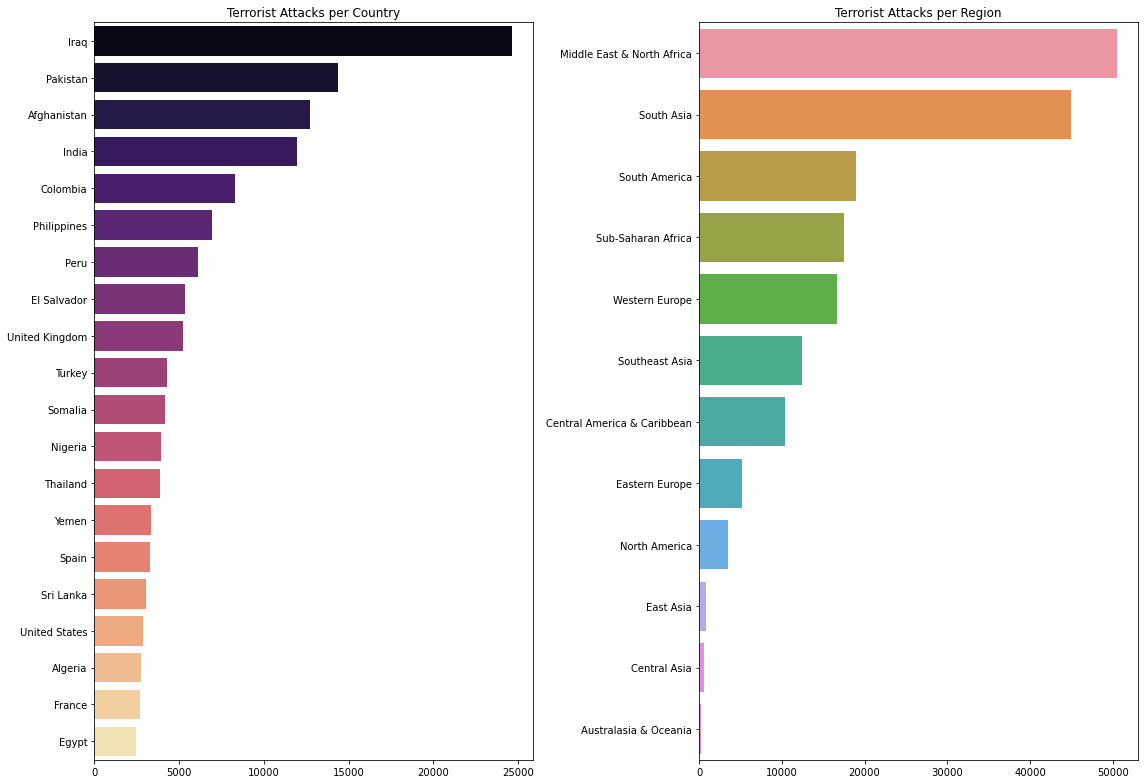

In [16]:

fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = dataset['Country'].value_counts()[:20].values, y = dataset['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=dataset['Region'].value_counts().values,y=dataset['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

***Country Suffered Maximum attacks and Minimum attacks***

In [17]:
terr=dataset.groupby(['Country'],as_index=False).count()

In [18]:
max_count=terr['Year'].max()
max_id=terr['Year'].idxmax()
max_name=terr['Country'][max_id]
min_count=terr['Year'].min()
min_id=terr['Year'].idxmin()
min_name=terr['Country'][min_id]

In [19]:
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


***Plotting Terrorist Organization***


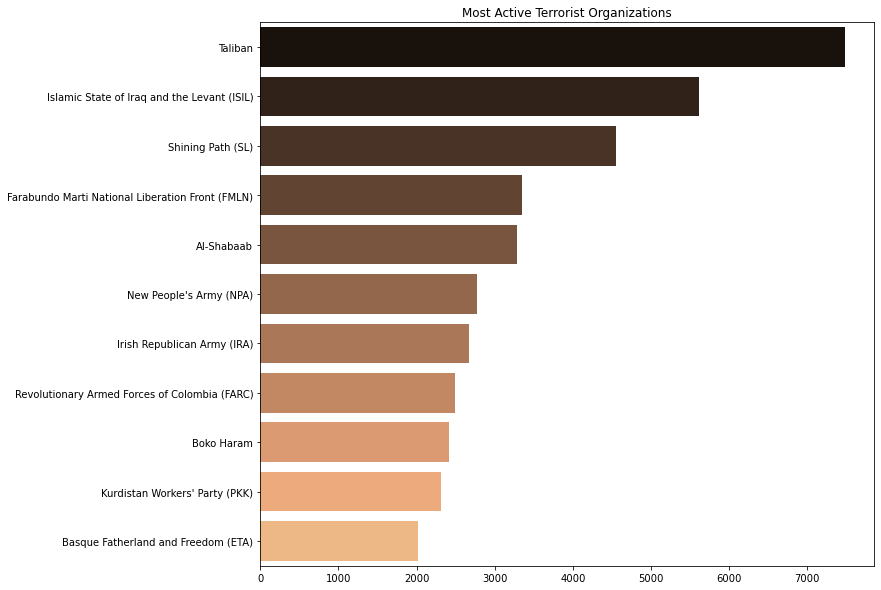

In [20]:
plt.subplots(figsize=(11,10))
sns.barplot(y=dataset['Group'].value_counts()[1:12].index,x=dataset['Group'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

***Plotting Before and After the War on Terror Data Graph***

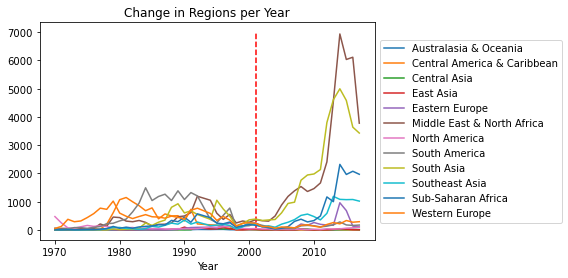

In [21]:
data_after = dataset[dataset['Year']>=2001]
ax = pd.crosstab(dataset.Year,dataset.Region).plot()
ax.set_title('Change in Regions per Year')
ax.legend(loc='center left',bbox_to_anchor = (1,0.5))
ax.vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')

It can be seen that after the declaration of war on terrorism, there is increase in the terrorist attacks. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and the South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa.



***Security Issues and Insights***

**Countplot of Weapon Types**

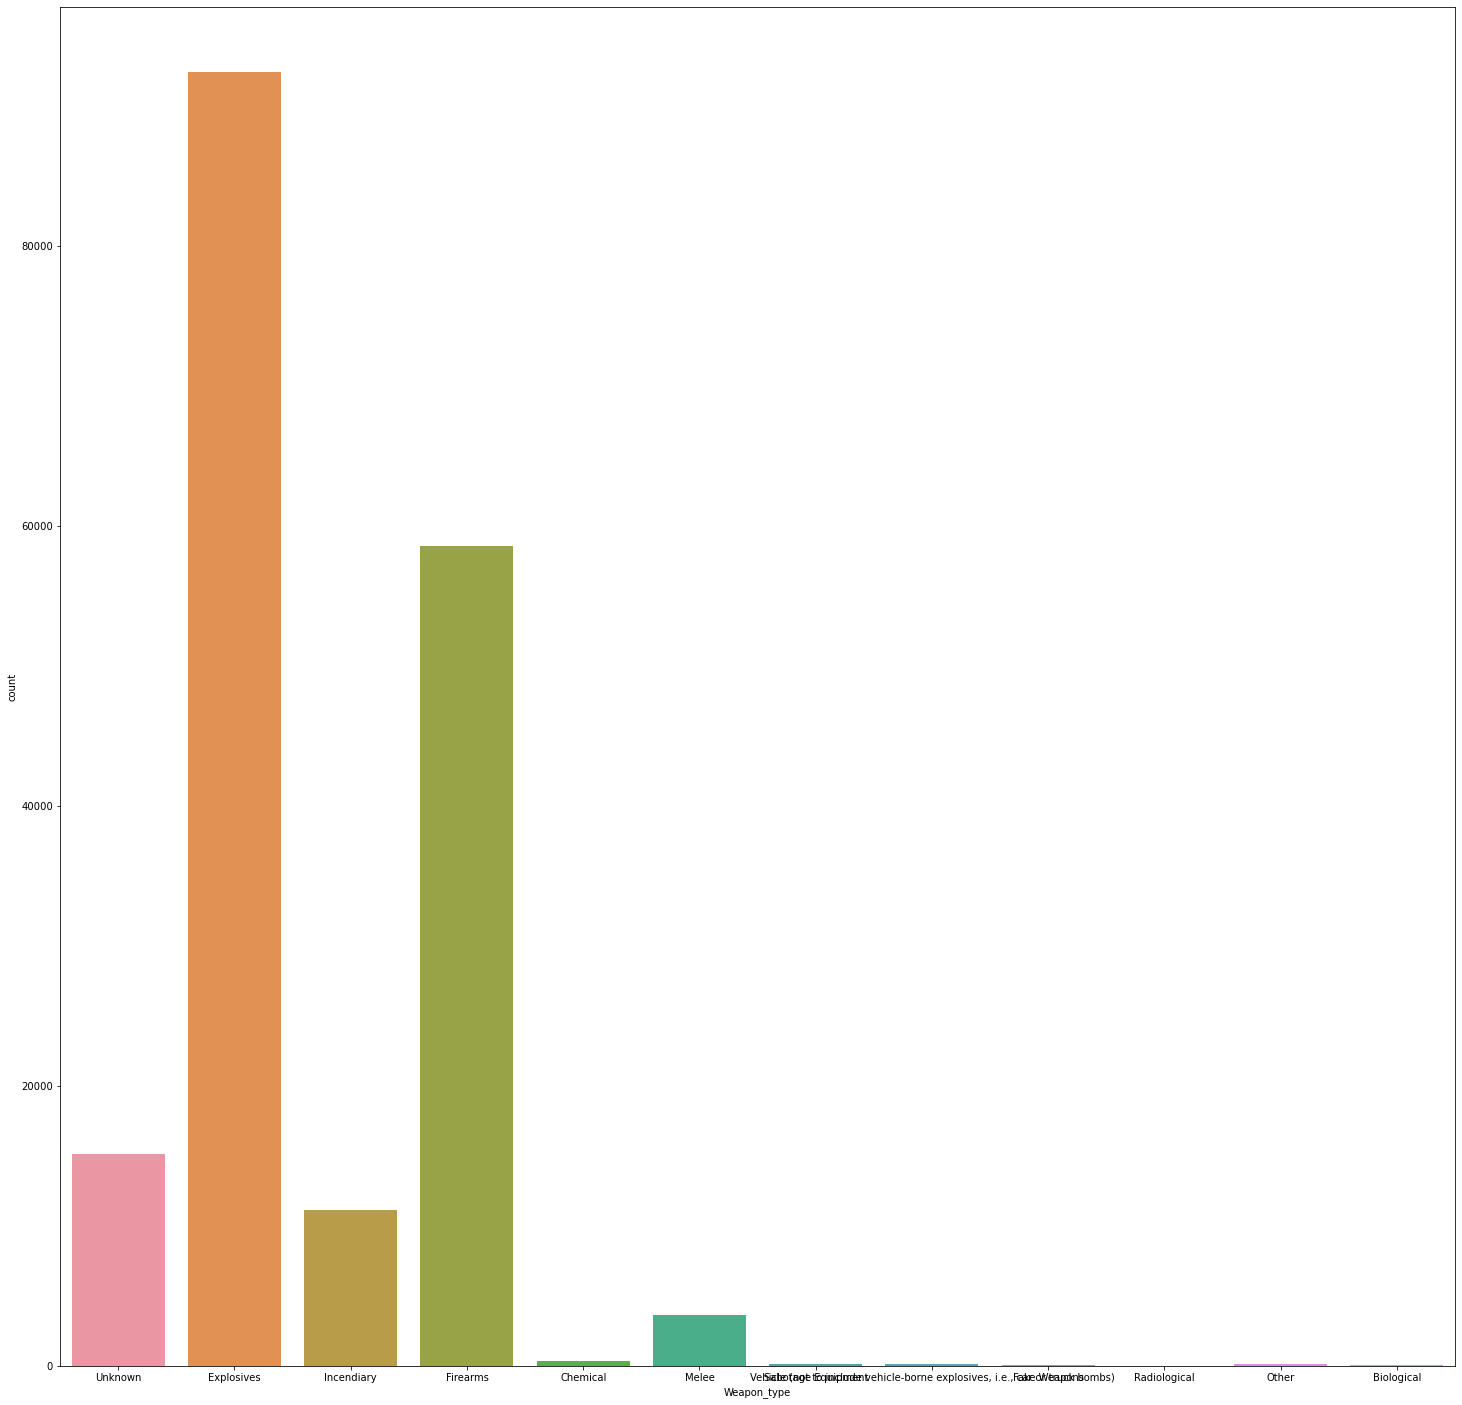

In [22]:
plt.figure(figsize=(25,25))
sns.countplot(x='Weapon_type', data=dataset)

***Bar Graph of Attack Type with different Target Types***

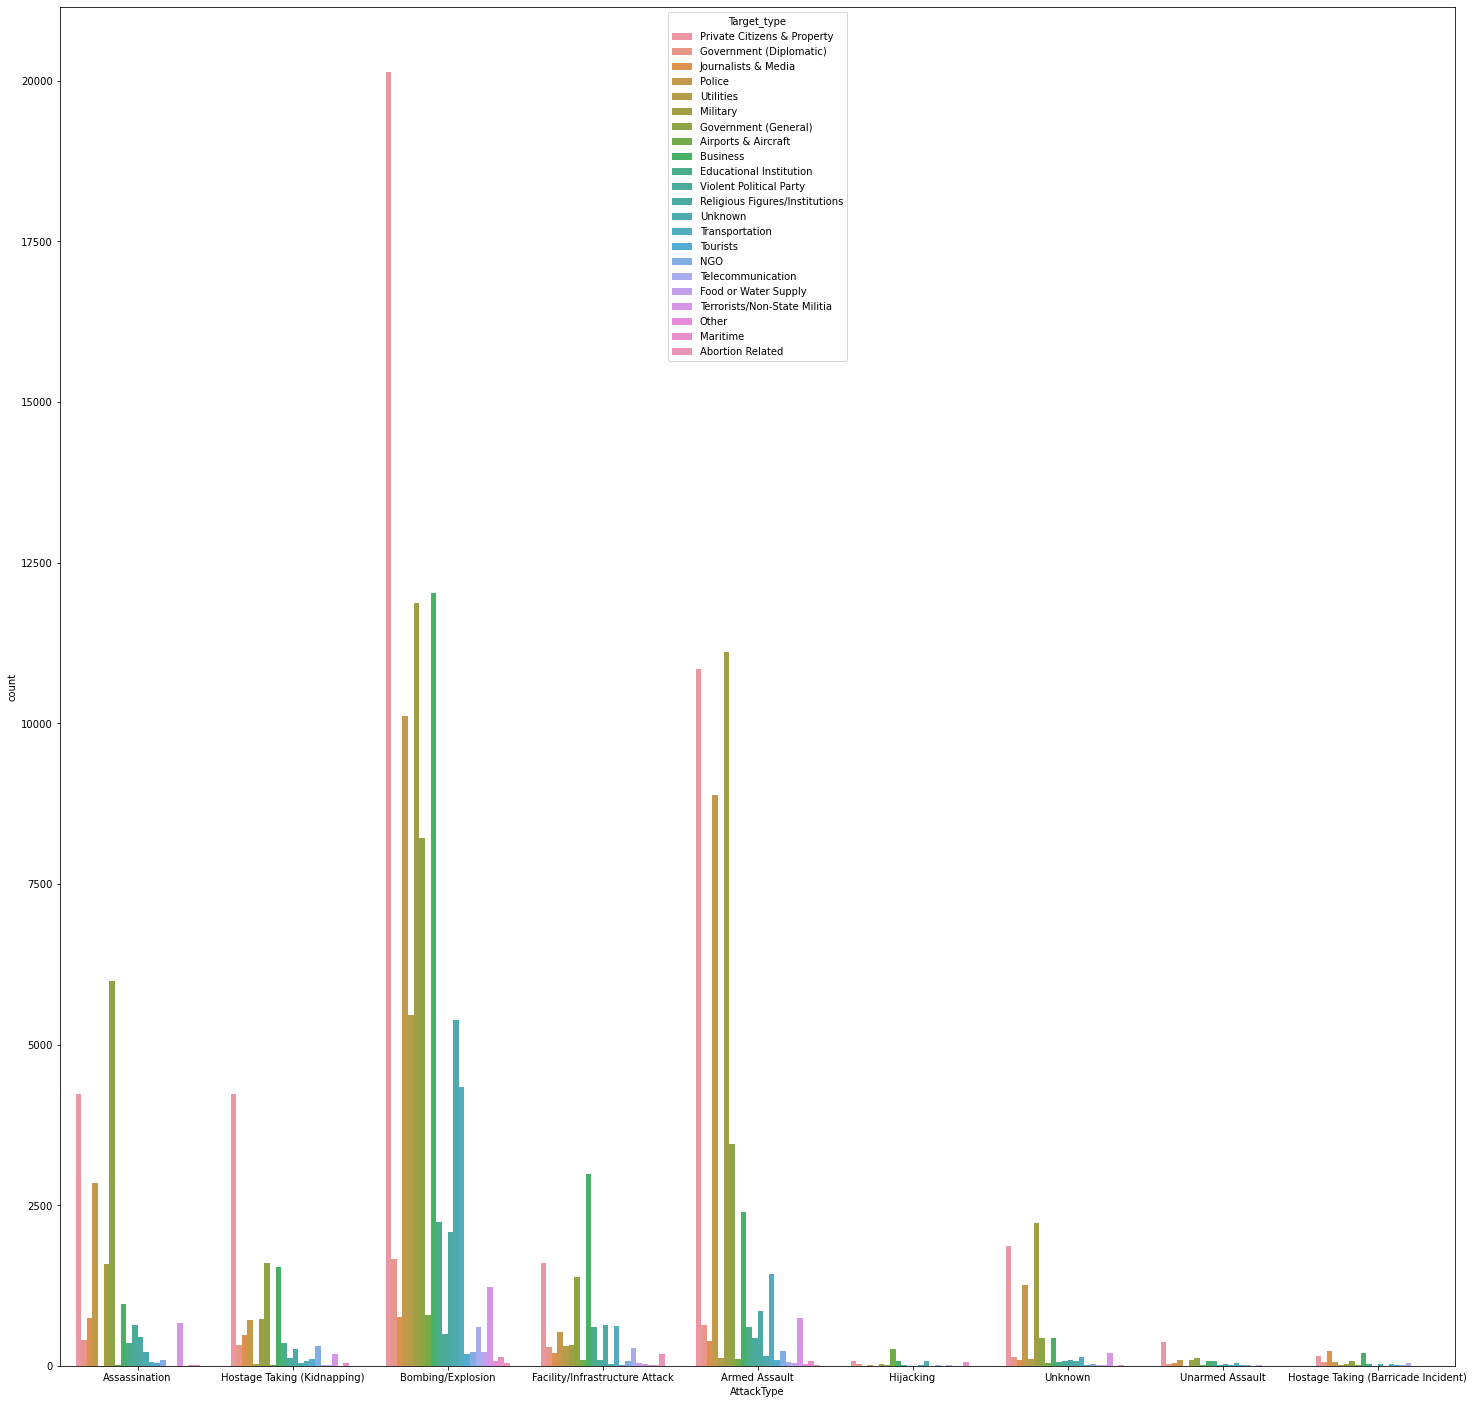

In [23]:
plt.figure(figsize=(25,25))
sns.countplot(x='AttackType', hue = 'Target_type' , data=dataset)

From the above plots following points are derived :

1.Attack type of Bombing/Explosive is more common on targets , mostly Private Citizens & Property type, people of Business type and people having millitary background have been targetted.

2.Attack type of Armed Assualt is second most common attack on people of Business type.

3.Attack type Assasinations are third most common attack on people having millitary background.

Also, it can be seen that there are huge number of weapons like Explosive and Incendiary are used. This affirms to the reported cases of attacks on the targets.

***Insight:***


Taliban and ISIL has been most active organization.
Iraq is the most attacked country.
The Middle East and North Africa Region has been most targeted.
Maximum number of attacks are because of Bombing/Explosive.
There are maximum number of attacks on Private Citizens and Property.
After the declaration of war against terrorism, the number of attacks have increased.